<a href="https://colab.research.google.com/github/lhayana/violence-detection-CV/blob/main/violence_detection_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup
Montando o drive, instalando e importando as bibliotecas necessárias

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
DRIVE_DATASET_PATH = '/content/drive/MyDrive/violence_dataset_frames'

In [3]:
!pip install transformers accelerate
!pip install torch torchvision opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 102.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvj

In [4]:
!pip install gradio --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 123.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.9 MB/s eta 0:00:00


In [5]:
!pip install torchvision --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 131.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 103.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15

In [6]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.models.video import r3d_18
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Caminho original no Drive
DRIVE_DATASET_PATH = '/content/drive/MyDrive/violence_dataset_frames'

# Caminho destino no disco local
LOCAL_DATASET_PATH = '/content/violence_dataset_frames'

# Copiar só o zip
!cp /content/drive/MyDrive/violence_dataset_frames.zip /content/

# Descompactar
!unzip /content/violence_dataset_frames.zip -d /content/

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: /content/violence_dataset_frames/train/violence/117/frame_0014.jpg  
  inflating: /content/violence_dataset_frames/train/violence/Hooligans_violence__English_Hooligans__JohnLaw__Wob3r1Leamw/frame_0013.jpg  
  inflating: /content/violence_dataset_frames/train/violence/117/frame_0012.jpg  
  inflating: /content/violence_dataset_frames/train/violence/117/frame_0013.jpg  
  inflating: /content/violence_dataset_frames/train/violence/V_199/frame_0001.jpg  
  inflating: /content/violence_dataset_frames/train/violence/117/frame_0009.jpg  
  inflating: /content/violence_dataset_frames/train/violence/117/frame_0005.jpg  
  inflating: /content/violence_dataset_frames/train/violence/117/frame_0007.jpg  
  inflating: /content/violence_dataset_frames/train/violence/Hooligans_violence__English_Hooligans__JohnLaw__Wob3r1Leamw/frame_0010.jpg  
  inflating: /content/violence_dataset_frames/train/violence/117/frame_0010.jpg  
  infla

Dataset: https://github.com/airtlab/A-Dataset-for-Automatic-Violence-Detection-in-Videos/tree/master/violence-detection-dataset

# ResNet3D-18

In [9]:
import os, glob, time, numpy as np, cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.models.video import r3d_18
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from torch.cuda.amp import autocast, GradScaler

In [10]:
# Dataset
class ViolenceFramesDataset(Dataset):
    def __init__(self, root_dir, split='train', num_frames=16):
        self.root_dir = os.path.join(root_dir, split)
        self.num_frames = num_frames
        self.samples = []
        self.labels_map = {'non-violence': 0, 'violence': 1}

        for label in ['non-violence', 'violence']:
            label_folder = os.path.join(self.root_dir, label)
            videos = os.listdir(label_folder)
            for video in videos:
                self.samples.append((os.path.join(label_folder, video), self.labels_map[label]))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        video_path, label = self.samples[idx]
        frames = sorted(glob.glob(os.path.join(video_path, '*.jpg')))
        if len(frames) < self.num_frames:
            frames = frames * (self.num_frames // len(frames) + 1)
        selected_frames = frames[:self.num_frames]

        frames_data = []
        for frame_path in selected_frames:
            frame = cv2.imread(frame_path)
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame = cv2.resize(frame, (112, 112))
            frame = frame.astype(np.float32) / 255.0
            frames_data.append(frame)

        frames_data = np.stack(frames_data, axis=0)
        frames_data = np.transpose(frames_data, (3, 0, 1, 2))  # C, T, H, W
        return torch.tensor(frames_data, dtype=torch.float32), torch.tensor(label, dtype=torch.long)

# Dataloaders
def create_dataloaders(dataset_path, batch_size=32, num_workers=4):
    train = ViolenceFramesDataset(dataset_path, 'train')
    val = ViolenceFramesDataset(dataset_path, 'val')
    test = ViolenceFramesDataset(dataset_path, 'test')
    train_loader = DataLoader(train, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
    val_loader = DataLoader(val, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)
    test_loader = DataLoader(test, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)
    return train_loader, val_loader, test_loader

In [11]:
# Configuração
DATASET_PATH = "/content/violence_dataset_frames"
train_loader, val_loader, test_loader = create_dataloaders(DATASET_PATH)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Usando dispositivo: {device}")

# Modelo
model = r3d_18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)
for param in model.parameters():
    param.requires_grad = False
for param in model.fc.parameters():
    param.requires_grad = True
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=1e-3)
scaler = GradScaler()

# EarlyStopping Config
patience = 8
best_val_loss = float('inf')
epochs_no_improve = 0

num_epochs = 50
train_losses, val_losses = [], []
start = time.time()

Usando dispositivo: cuda


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=R3D_18_Weights.KINETICS400_V1`. You can also use `weights=R3D_18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/r3d_18-b3b3357e.pth" to /root/.cache/torch/hub/checkpoints/r3d_18-b3b3357e.pth


100%|██████████| 127M/127M [00:00<00:00, 204MB/s]
<ipython-input-11-eea81546b25d>:18: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


In [12]:
# Treinamento
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for videos, labels in train_loader:
        videos = videos.to(device, non_blocking=True)
        labels = labels.to(device, non_blocking=True)
        optimizer.zero_grad()
        with autocast():
            outputs = model(videos)
            loss = criterion(outputs, labels)
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        running_loss += loss.item()
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validação
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for videos, labels in val_loader:
            videos = videos.to(device, non_blocking=True)
            labels = labels.to(device, non_blocking=True)
            with autocast():
                outputs = model(videos)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f"Época [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    # EarlyStopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), "best_model.pth")
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Parando treino por early stopping na época {epoch+1}")
            break

end = time.time()
print(f"Tempo total de treino: {(end - start)/60:.2f} minutos")

<ipython-input-12-5f1d8a1bf989>:9: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
<ipython-input-12-5f1d8a1bf989>:26: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Época [1/50], Train Loss: 0.5559, Val Loss: 0.4074
Época [2/50], Train Loss: 0.3854, Val Loss: 0.3390
Época [3/50], Train Loss: 0.3472, Val Loss: 0.3321
Época [4/50], Train Loss: 0.3309, Val Loss: 0.3033
Época [5/50], Train Loss: 0.3154, Val Loss: 0.3083
Época [6/50], Train Loss: 0.3049, Val Loss: 0.3071
Época [7/50], Train Loss: 0.2951, Val Loss: 0.3015
Época [8/50], Train Loss: 0.3174, Val Loss: 0.3237
Época [9/50], Train Loss: 0.2849, Val Loss: 0.2897
Época [10/50], Train Loss: 0.2878, Val Loss: 0.3144
Época [11/50], Train Loss: 0.2680, Val Loss: 0.2809
Época [12/50], Train Loss: 0.2606, Val Loss: 0.2754
Época [13/50], Train Loss: 0.2836, Val Loss: 0.2899
Época [14/50], Train Loss: 0.2613, Val Loss: 0.2764
Época [15/50], Train Loss: 0.2660, Val Loss: 0.2747
Época [16/50], Train Loss: 0.2672, Val Loss: 0.2765
Época [17/50], Train Loss: 0.2589, Val Loss: 0.2718
Época [18/50], Train Loss: 0.2488, Val Loss: 0.2767
Época [19/50], Train Loss: 0.2524, Val Loss: 0.2740
Época [20/50], Train 


✅ Acurácia no conjunto de teste: 88.28%

📊 Relatório de Classificação:
              precision    recall  f1-score   support

Non-Violence       0.88      0.87      0.88       209
    Violence       0.88      0.89      0.89       226

    accuracy                           0.88       435
   macro avg       0.88      0.88      0.88       435
weighted avg       0.88      0.88      0.88       435



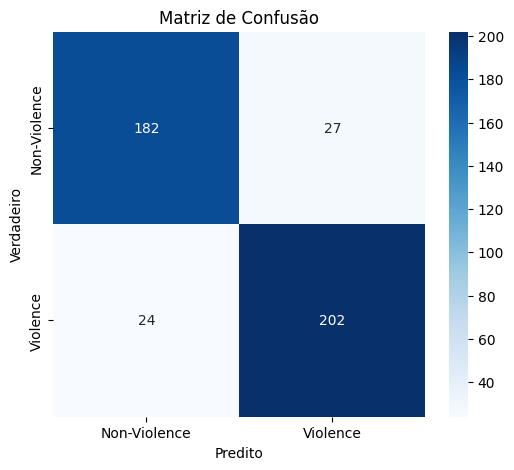

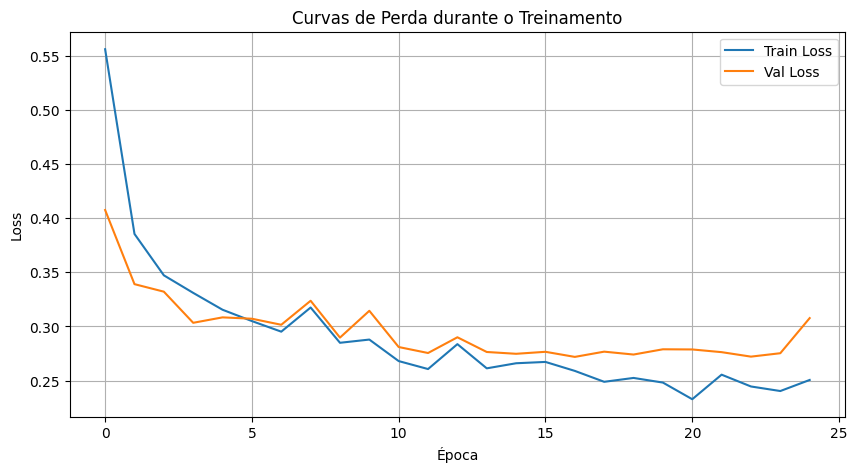

In [13]:
# Avaliação no conjunto de teste
model.load_state_dict(torch.load("best_model.pth"))
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for videos, labels in test_loader:
        videos = videos.to(device)
        labels = labels.to(device)
        outputs = model(videos)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

acc = accuracy_score(all_labels, all_preds)
print(f"\n Acurácia no conjunto de teste: {acc * 100:.2f}%")
print("\n Relatório de Classificação:")
print(classification_report(all_labels, all_preds, target_names=["Non-Violence", "Violence"]))

# Matriz de confusão
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Violence", "Violence"], yticklabels=["Non-Violence", "Violence"])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

# Curvas de perda
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Curvas de Perda durante o Treinamento')
plt.grid()
plt.legend()
plt.show()

# VideoMAE (modelo pré-treinado com Kinetics-400)

In [14]:
# Imports
import os, glob, cv2
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.pyplot as plt
from transformers import VideoMAEModel, VideoMAEImageProcessor, get_cosine_schedule_with_warmup
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix, classification_report
import random
import time
from tqdm.auto import tqdm

# Configurações de performance para A100
torch.backends.cudnn.benchmark = True  # Otimiza operações convolucionais
torch.backends.cuda.matmul.allow_tf32 = True  # Permite TF32 na A100
torch.backends.cudnn.allow_tf32 = True  # Permite TF32 em operações cuDNN

# Caminho para o dataset
DATASET_PATH = "/content/violence_dataset_frames"

# Transformações para aumento de dados
def get_transforms(mode='train'):
    if mode == 'train':
        return transforms.Compose([
            transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomVerticalFlip(p=0.2),  # Adicionado para aumentar variabilidade
            transforms.RandomRotation(15),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Pequenas translações
        ])
    return None

In [15]:
# Collate + Preprocess com VideoMAEProcessor
processor = VideoMAEImageProcessor.from_pretrained("MCG-NJU/videomae-base")

def collate_fn(batch):
    videos, labels = zip(*batch)
    processed = processor(list(videos), return_tensors="pt")
    return processed["pixel_values"], torch.tensor(labels)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

In [26]:
# Dataset adaptado para VideoMAE com aumento de dados e caching
class ViolenceDataset(Dataset):
    def __init__(self, root_dir, split='train', num_frames=16, size=(224, 224), transform=None, use_cache=True):
        self.root_dir = os.path.join(root_dir, split)
        self.num_frames = num_frames
        self.size = size
        self.transform = transform
        self.use_cache = use_cache
        self.cache = {}  # Cache para frames

        self.samples = []
        self.labels_map = {'non-violence': 0, 'violence': 1}

        print(f"Carregando dataset {split}...")
        for label in self.labels_map:
            label_path = os.path.join(self.root_dir, label)
            if not os.path.exists(label_path): continue
            for folder in os.listdir(label_path):
                self.samples.append((os.path.join(label_path, folder), self.labels_map[label]))

        # Balanceamento de classes (opcional)
        self._balance_classes()
        print(f"Total de amostras no dataset {split}: {len(self.samples)}")

    def _balance_classes(self):
        # Contar amostras por classe
        class_counts = {}
        for _, label in self.samples:
            class_counts[label] = class_counts.get(label, 0) + 1

        print(f"Distribuição de classes: {class_counts}")

        # Se desbalanceado, equilibrar (opcional)
        if len(set(class_counts.values())) > 1:
            max_count = max(class_counts.values())
            balanced_samples = []
            class_samples = {c: [] for c in class_counts.keys()}

            for sample in self.samples:
                class_samples[sample[1]].append(sample)

            for c in class_samples:
                if len(class_samples[c]) < max_count:
                    # Oversampling para classes minoritárias
                    needed = max_count - len(class_samples[c])
                    balanced_samples.extend(class_samples[c])
                    balanced_samples.extend(random.choices(class_samples[c], k=needed))
                else:
                    balanced_samples.extend(class_samples[c])

            random.shuffle(balanced_samples)
            self.samples = balanced_samples

            # Verificar o novo balanceamento
            new_counts = {}
            for _, label in self.samples:
                new_counts[label] = new_counts.get(label, 0) + 1
            print(f"Nova distribuição após balanceamento: {new_counts}")

    def _load_frames(self, video_path):
        # Chave de cache baseada no caminho e configurações
        cache_key = f"{video_path}_{self.num_frames}_{self.size[0]}_{self.size[1]}"

        # Verificar cache
        if self.use_cache and cache_key in self.cache:
            return self.cache[cache_key]

        # Carregar frames
        frame_paths = sorted(glob.glob(os.path.join(video_path, '*.jpg')))

        # Lidar com vídeos com poucos frames
        if len(frame_paths) < self.num_frames:
            frame_paths = frame_paths * (self.num_frames // len(frame_paths) + 1)

        # Amostragem uniforme de frames para capturar todo o vídeo
        if len(frame_paths) > self.num_frames:
            indices = np.linspace(0, len(frame_paths)-1, self.num_frames, dtype=int)
            frame_paths = [frame_paths[i] for i in indices]
        else:
            frame_paths = frame_paths[:self.num_frames]

        frames = []
        for fp in frame_paths:
            frame = cv2.imread(fp)
            if frame is None:
                # Lidar com erro de leitura de frame
                print(f"Erro ao ler frame: {fp}")
                frame = np.zeros((self.size[0], self.size[1], 3), dtype=np.uint8)
            else:
                frame = cv2.resize(frame, self.size)
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame)

        # Armazenar no cache
        if self.use_cache:
            self.cache[cache_key] = frames

        return frames

    def __getitem__(self, idx):
        video_path, label = self.samples[idx]
        frames = self._load_frames(video_path)

        # Aplicar transformações de aumento de dados
        if self.transform:
            # Aplicar as mesmas transformações em todos os frames
            seed = np.random.randint(2147483647)
            random.seed(seed)
            torch.manual_seed(seed)

            augmented_frames = []
            for frame in frames:
                # Converter para PIL para compatibilidade com transforms
                pil_img = transforms.ToPILImage()(frame)
                augmented_img = self.transform(pil_img)
                augmented_frames.append(np.array(augmented_img))
            frames = augmented_frames

        return frames, label

    def __len__(self):
        return len(self.samples)

# Collate + Preprocess com VideoMAEProcessor
processor = VideoMAEImageProcessor.from_pretrained("MCG-NJU/videomae-base")

def collate_fn(batch):
    videos, labels = zip(*batch)
    processed = processor(list(videos), return_tensors="pt")
    return processed["pixel_values"], torch.tensor(labels)

In [27]:
# Modelo otimizado para A100
class VideoMAEForViolenceClassification(nn.Module):
    def __init__(self, dropout_rate=0.3, use_learnable_pooling=True, freeze_layers=80):
        super().__init__()
        self.backbone = VideoMAEModel.from_pretrained("MCG-NJU/videomae-base")

        # Congelar algumas camadas para estabilidade e performance
        if freeze_layers > 0:
            for name, param in list(self.backbone.named_parameters())[:freeze_layers]:
                param.requires_grad = False

        hidden_size = self.backbone.config.hidden_size

        # Pooling aprendível (atenção)
        self.use_learnable_pooling = use_learnable_pooling
        if use_learnable_pooling:
            self.attention_pool = nn.Sequential(
                nn.Linear(hidden_size, 256),
                nn.GELU(),  # GELU tem melhores resultados em modelos transformer
                nn.Linear(256, 1),
                nn.Softmax(dim=1)
            )

        # MLP classificador com skip connection
        self.pre_classifier = nn.Sequential(
            nn.LayerNorm(hidden_size),
            nn.Dropout(p=dropout_rate),
            nn.Linear(hidden_size, 512),
            nn.GELU(),
            nn.LayerNorm(512),
        )

        self.classifier = nn.Sequential(
            nn.Dropout(p=dropout_rate/2),
            nn.Linear(512, 128),
            nn.GELU(),
            nn.LayerNorm(128),
            nn.Linear(128, 2)
        )

        # Inicialização dos pesos para convergência mais rápida
        self._init_weights()

    def _init_weights(self):
        # Inicialização de pesos para camadas lineares
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def forward(self, pixel_values):
        outputs = self.backbone(pixel_values=pixel_values)

        if self.use_learnable_pooling:
            # Usar atenção ponderada em vez de apenas o token CLS
            hidden_states = outputs.last_hidden_state
            attention_weights = self.attention_pool(hidden_states)
            feature = torch.sum(attention_weights * hidden_states, dim=1)
        else:
            # Usar apenas o token CLS
            feature = outputs.last_hidden_state[:, 0]

        # Forward com skip connection
        pre_cls = self.pre_classifier(feature)
        return self.classifier(pre_cls)

In [28]:
# Early Stopping aprimorado com métricas múltiplas
class EarlyStopping:
    def __init__(self, patience=5, verbose=True, delta=0.0001, path='checkpoint.pt', metric='loss'):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = float('inf') if metric == 'loss' else -float('inf')
        self.early_stop = False
        self.delta = delta
        self.path = path
        self.metric = metric  # 'loss' ou 'accuracy'

    def __call__(self, score, model):
        if self.metric == 'loss':
            improved = score < self.best_score - self.delta
        else:  # accuracy
            improved = score > self.best_score + self.delta

        if improved:
            if self.verbose:
                print(f"{self.metric.capitalize()} melhorou de {self.best_score:.4f} para {score:.4f}. Salvando modelo...")
            self.best_score = score
            self.save_checkpoint(model)
            self.counter = 0
        else:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping: {self.counter}/{self.patience} sem melhoria.")
            if self.counter >= self.patience:
                self.early_stop = True

    def save_checkpoint(self, model):
        torch.save(model.state_dict(), self.path)

In [29]:
# Função auxiliar para calcular métricas
def compute_metrics(model, dataloader, device):
    model.eval()
    all_preds = []
    all_labels = []
    total_loss = 0
    criterion = nn.CrossEntropyLoss()

    with torch.no_grad():
        for pixel_values, labels in dataloader:
            pixel_values = pixel_values.to(device)
            labels = labels.to(device)

            outputs = model(pixel_values)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = np.mean(np.array(all_preds) == np.array(all_labels))
    avg_loss = total_loss / len(dataloader)

    return {
        'accuracy': accuracy,
        'loss': avg_loss,
        'predictions': all_preds,
        'labels': all_labels
    }

In [30]:
# Função de treino otimizada para A100
def train_model(model, train_loader, val_loader, num_epochs=30,
                lr=5e-5 * 8,  # Aumento do lr base devido ao batch maior
                warmup_steps=100,
                weight_decay=2e-5,
                checkpoint_path='best_model.pt',
                patience=6):

    device = torch.device("cuda")
    model = model.to(device)

    # Otimizador com peso diferenciado por camada
    optimizer = torch.optim.AdamW([
        {'params': [p for n, p in model.backbone.named_parameters() if p.requires_grad], 'lr': lr / 10},
        {'params': model.attention_pool.parameters() if hasattr(model, 'attention_pool') else [], 'lr': lr / 2},
        {'params': model.pre_classifier.parameters(), 'lr': lr},
        {'params': model.classifier.parameters(), 'lr': lr}
    ], weight_decay=weight_decay)

    # Scheduler com warmup
    total_steps = len(train_loader) * num_epochs
    scheduler = get_cosine_schedule_with_warmup(
        optimizer,
        num_warmup_steps=warmup_steps,
        num_training_steps=total_steps
    )

    # Loss com focal loss para lidar com classes desbalanceadas
    class FocalLoss(nn.Module):
        def __init__(self, alpha=0.25, gamma=2):
            super().__init__()
            self.alpha = alpha
            self.gamma = gamma
            self.ce = nn.CrossEntropyLoss(reduction='none')

        def forward(self, inputs, targets):
            ce_loss = self.ce(inputs, targets)
            pt = torch.exp(-ce_loss)
            focal_loss = self.alpha * (1-pt)**self.gamma * ce_loss
            return focal_loss.mean()

    criterion = FocalLoss(alpha=0.25, gamma=2)
    scaler = torch.cuda.amp.GradScaler()

    # Early Stopping
    early_stopping = EarlyStopping(patience=patience, verbose=True, path=checkpoint_path, metric='accuracy')

    # Registros
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []

    # Tracking do tempo
    start_time = time.time()

    print("Iniciando treinamento...")
    for epoch in range(num_epochs):
        epoch_start = time.time()

        # Treino
        model.train()
        train_loss = 0.0
        correct = 0
        total = 0

        # Usar tqdm para progressbar
        progress_bar = tqdm(train_loader, desc=f"Época {epoch+1}/{num_epochs} [Treino]")
        for pixel_values, labels in progress_bar:
            pixel_values = pixel_values.to(device, non_blocking=True)
            labels = labels.to(device, non_blocking=True)

            optimizer.zero_grad(set_to_none=True)  # Mais eficiente que zero_grad()

            with torch.cuda.amp.autocast():  # Mixed precision para A100
                outputs = model(pixel_values)
                loss = criterion(outputs, labels)

            scaler.scale(loss).backward()

            # Gradient clipping
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            scaler.step(optimizer)
            scaler.update()
            scheduler.step()

            # Métricas
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Atualizar progress bar
            progress_bar.set_postfix({
                'loss': f"{loss.item():.4f}",
                'acc': f"{100 * correct / total:.2f}%",
                'lr': f"{optimizer.param_groups[0]['lr']:.2e}"
            })

        avg_train_loss = train_loss / len(train_loader)
        train_accuracy = 100 * correct / total
        train_losses.append(avg_train_loss)
        train_accs.append(train_accuracy)

        # Validação
        val_metrics = compute_metrics(model, val_loader, device)
        val_losses.append(val_metrics['loss'])
        val_accs.append(100 * val_metrics['accuracy'])

        # Tempo por época
        epoch_time = time.time() - epoch_start

        print(f"Época [{epoch+1}/{num_epochs}] - "
              f"Tempo: {epoch_time:.1f}s - "
              f"Train Loss: {avg_train_loss:.4f}, Acc: {train_accuracy:.2f}% - "
              f"Val Loss: {val_metrics['loss']:.4f}, Acc: {100 * val_metrics['accuracy']:.2f}%")

        # Early stopping
        early_stopping(val_metrics['accuracy'], model)
        if early_stopping.early_stop:
            print("Parando treino por early stopping.")
            break

    # Tempo total de treinamento
    total_time = time.time() - start_time
    print(f"Treinamento completo em {total_time/60:.2f} minutos")

    # Carregar melhor modelo
    model.load_state_dict(torch.load(checkpoint_path))

    return {
        'model': model,
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accs': train_accs,
        'val_accs': val_accs,
        'training_time': total_time
    }

In [31]:
# Script principal
def run_training():
    # Definir seed para reprodutibilidade
    seed = 42
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

    # Verificar disponibilidade da A100
    if torch.cuda.is_available():
        device_name = torch.cuda.get_device_name()
        print(f"GPU detectada: {device_name}")

        # Verificar se temos A100
        if "A100" in device_name:
            print("GPU A100 detectada! Utilizando configurações otimizadas.")
            # Aumentar batch size para A100
            batch_size = 32  # Otimizado para A100
        else:
            print(f"GPU {device_name} detectada. Usando configurações padrão.")
            batch_size = 8
    else:
        print("GPU não detectada. O treinamento será muito lento em CPU.")
        batch_size = 4

    print(f"Batch size: {batch_size}")

    # Dataset com aumento de dados
    train_transform = get_transforms(mode='train')
    dataset = ViolenceDataset(DATASET_PATH, split='train', transform=train_transform, use_cache=True)

    # Splitting para validação
    dataset_size = len(dataset)
    val_size = int(0.2 * dataset_size)
    train_size = dataset_size - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    # Dataset de teste
    test_dataset = ViolenceDataset(DATASET_PATH, split='test', transform=None, use_cache=True)

    # Modelo otimizado
    model = VideoMAEForViolenceClassification(dropout_rate=0.25, use_learnable_pooling=True, freeze_layers=80)

    # Contagem de parâmetros
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Total de parâmetros: {total_params:,}")
    print(f"Parâmetros treináveis: {trainable_params:,} ({100 * trainable_params / total_params:.2f}%)")

    # Otimizações para DataLoader com A100
    persistent_workers = True
    prefetch_factor = 4

    # Se usar num_workers > 0, PyTorch pode criar processos worker que persistem
    # entre chamadas de iteração. Isso reduz a sobrecarga de criação de processos.

    # Loaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        collate_fn=collate_fn,
        num_workers=4,
        pin_memory=True,
        persistent_workers=persistent_workers,
        prefetch_factor=prefetch_factor
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        collate_fn=collate_fn,
        num_workers=4,
        pin_memory=True,
        persistent_workers=persistent_workers
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        collate_fn=collate_fn,
        num_workers=4,
        pin_memory=True
    )

    # Treinamento com configurações otimizadas
    results = train_model(
        model,
        train_loader,
        val_loader,
        num_epochs=50,  # Aumentamos o número de épocas, early stopping irá parar quando necessário
        lr=1e-4 * (batch_size/8),  # Ajuste de lr para batch size maior
        warmup_steps=len(train_loader) // 2,  # 1/2 época de warmup
        weight_decay=1e-5,
        checkpoint_path='best_a100_model.pt',
        patience=8
    )

    model = results['model']

    # Avaliação no conjunto de teste
    print("\nAvaliando no conjunto de teste...")
    test_metrics = compute_metrics(model, test_loader, torch.device("cuda"))

    print(f"Acurácia no conjunto de teste: {100 * test_metrics['accuracy']:.2f}%")

    # Matriz de confusão e relatório de classificação
    cm = confusion_matrix(test_metrics['labels'], test_metrics['predictions'])
    print("\nMatriz de Confusão:")
    print(cm)

    print("\nRelatório de Classificação:")
    print(classification_report(test_metrics['labels'], test_metrics['predictions'],
                              target_names=['Non-Violence', 'Violence']))

    # Gráfico de perdas e acurácias
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    plt.plot(results['train_losses'], label='Train Loss')
    plt.plot(results['val_losses'], label='Validation Loss')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.title('Loss durante o Treinamento')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(results['train_accs'], label='Train Accuracy')
    plt.plot(results['val_accs'], label='Validation Accuracy')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia (%)')
    plt.title('Acurácia durante o Treinamento')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.savefig('training_metrics.png', dpi=300)
    plt.show()

    # Salvar modelo
    MODEL_DIR = '/content/drive/MyDrive/models'
    os.makedirs(MODEL_DIR, exist_ok=True)

    torch.save({
        'model_state_dict': model.state_dict(),
        'train_losses': results['train_losses'],
        'val_losses': results['val_losses'],
        'train_accs': results['train_accs'],
        'val_accs': results['val_accs'],
        'test_accuracy': test_metrics['accuracy'],
        'training_time': results['training_time'],
        'batch_size': batch_size
    }, os.path.join(MODEL_DIR, 'violence_videomae_a100.pth'))

    print(f"Modelo salvo com sucesso em: {MODEL_DIR}/violence_videomae_a100.pth")

    return model, results, test_metrics

GPU detectada: NVIDIA A100-SXM4-40GB
✅ GPU A100 detectada! Utilizando configurações otimizadas.
Batch size: 32
Carregando dataset train...
Distribuição de classes: {0: 975, 1: 1052}
Nova distribuição após balanceamento: {1: 1052, 0: 1052}
Total de amostras no dataset train: 2104
Carregando dataset test...
Distribuição de classes: {0: 209, 1: 226}
Nova distribuição após balanceamento: {0: 226, 1: 226}
Total de amostras no dataset test: 452


config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/377M [00:00<?, ?B/s]

Total de parâmetros: 86,886,787
Parâmetros treináveis: 49,679,491 (57.18%)
Iniciando treinamento...


<ipython-input-30-f8e2735069e1>:43: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()


Época 1/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

<ipython-input-30-f8e2735069e1>:73: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed precision para A100


Época [1/50] - Tempo: 55.4s - Train Loss: 0.0815, Acc: 49.88% - Val Loss: 0.6880, Acc: 57.62%
Accuracy melhorou de -inf para 0.5762. Salvando modelo...


Época 2/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [2/50] - Tempo: 52.4s - Train Loss: 0.0451, Acc: 51.37% - Val Loss: 0.6950, Acc: 50.71%
EarlyStopping: 1/8 sem melhoria.


Época 3/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [3/50] - Tempo: 51.4s - Train Loss: 0.0444, Acc: 52.43% - Val Loss: 0.6866, Acc: 53.33%
EarlyStopping: 2/8 sem melhoria.


Época 4/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [4/50] - Tempo: 51.1s - Train Loss: 0.0433, Acc: 53.98% - Val Loss: 0.6824, Acc: 55.00%
EarlyStopping: 3/8 sem melhoria.


Época 5/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [5/50] - Tempo: 50.8s - Train Loss: 0.0428, Acc: 56.24% - Val Loss: 0.6941, Acc: 52.62%
EarlyStopping: 4/8 sem melhoria.


Época 6/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [6/50] - Tempo: 50.8s - Train Loss: 0.0434, Acc: 54.81% - Val Loss: 0.6813, Acc: 57.62%
EarlyStopping: 5/8 sem melhoria.


Época 7/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [7/50] - Tempo: 51.1s - Train Loss: 0.0428, Acc: 54.75% - Val Loss: 0.6876, Acc: 53.81%
EarlyStopping: 6/8 sem melhoria.


Época 8/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [8/50] - Tempo: 50.5s - Train Loss: 0.0418, Acc: 57.72% - Val Loss: 0.6730, Acc: 60.71%
Accuracy melhorou de 0.5762 para 0.6071. Salvando modelo...


Época 9/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [9/50] - Tempo: 50.3s - Train Loss: 0.0421, Acc: 58.79% - Val Loss: 0.6881, Acc: 55.00%
EarlyStopping: 1/8 sem melhoria.


Época 10/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [10/50] - Tempo: 50.8s - Train Loss: 0.0419, Acc: 56.89% - Val Loss: 0.6716, Acc: 60.48%
EarlyStopping: 2/8 sem melhoria.


Época 11/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [11/50] - Tempo: 50.2s - Train Loss: 0.0417, Acc: 59.26% - Val Loss: 0.6636, Acc: 58.81%
EarlyStopping: 3/8 sem melhoria.


Época 12/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [12/50] - Tempo: 50.7s - Train Loss: 0.0414, Acc: 60.15% - Val Loss: 0.6705, Acc: 57.38%
EarlyStopping: 4/8 sem melhoria.


Época 13/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [13/50] - Tempo: 50.3s - Train Loss: 0.0413, Acc: 59.26% - Val Loss: 0.6550, Acc: 60.48%
EarlyStopping: 5/8 sem melhoria.


Época 14/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [14/50] - Tempo: 50.4s - Train Loss: 0.0414, Acc: 59.26% - Val Loss: 0.6613, Acc: 59.52%
EarlyStopping: 6/8 sem melhoria.


Época 15/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [15/50] - Tempo: 50.7s - Train Loss: 0.0404, Acc: 59.38% - Val Loss: 0.6599, Acc: 64.05%
Accuracy melhorou de 0.6071 para 0.6405. Salvando modelo...


Época 16/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [16/50] - Tempo: 50.7s - Train Loss: 0.0413, Acc: 58.43% - Val Loss: 0.6455, Acc: 62.14%
EarlyStopping: 1/8 sem melhoria.


Época 17/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [17/50] - Tempo: 50.7s - Train Loss: 0.0393, Acc: 62.95% - Val Loss: 0.6535, Acc: 62.14%
EarlyStopping: 2/8 sem melhoria.


Época 18/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [18/50] - Tempo: 50.7s - Train Loss: 0.0391, Acc: 63.18% - Val Loss: 0.6663, Acc: 62.62%
EarlyStopping: 3/8 sem melhoria.


Época 19/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [19/50] - Tempo: 51.0s - Train Loss: 0.0396, Acc: 62.11% - Val Loss: 0.6415, Acc: 66.67%
Accuracy melhorou de 0.6405 para 0.6667. Salvando modelo...


Época 20/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [20/50] - Tempo: 50.5s - Train Loss: 0.0381, Acc: 65.44% - Val Loss: 0.6515, Acc: 64.05%
EarlyStopping: 1/8 sem melhoria.


Época 21/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [21/50] - Tempo: 50.8s - Train Loss: 0.0383, Acc: 65.62% - Val Loss: 0.6358, Acc: 65.95%
EarlyStopping: 2/8 sem melhoria.


Época 22/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [22/50] - Tempo: 51.2s - Train Loss: 0.0384, Acc: 65.97% - Val Loss: 0.6412, Acc: 65.24%
EarlyStopping: 3/8 sem melhoria.


Época 23/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [23/50] - Tempo: 50.8s - Train Loss: 0.0375, Acc: 65.68% - Val Loss: 0.6484, Acc: 60.95%
EarlyStopping: 4/8 sem melhoria.


Época 24/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [24/50] - Tempo: 51.2s - Train Loss: 0.0368, Acc: 67.64% - Val Loss: 0.6179, Acc: 66.43%
EarlyStopping: 5/8 sem melhoria.


Época 25/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [25/50] - Tempo: 50.9s - Train Loss: 0.0359, Acc: 70.07% - Val Loss: 0.5944, Acc: 70.00%
Accuracy melhorou de 0.6667 para 0.7000. Salvando modelo...


Época 26/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [26/50] - Tempo: 50.8s - Train Loss: 0.0360, Acc: 69.71% - Val Loss: 0.6158, Acc: 68.33%
EarlyStopping: 1/8 sem melhoria.


Época 27/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [27/50] - Tempo: 50.4s - Train Loss: 0.0364, Acc: 67.58% - Val Loss: 0.6204, Acc: 67.14%
EarlyStopping: 2/8 sem melhoria.


Época 28/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [28/50] - Tempo: 50.6s - Train Loss: 0.0340, Acc: 70.67% - Val Loss: 0.5928, Acc: 70.00%
EarlyStopping: 3/8 sem melhoria.


Época 29/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [29/50] - Tempo: 51.3s - Train Loss: 0.0328, Acc: 73.28% - Val Loss: 0.5805, Acc: 70.48%
Accuracy melhorou de 0.7000 para 0.7048. Salvando modelo...


Época 30/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [30/50] - Tempo: 51.1s - Train Loss: 0.0323, Acc: 72.98% - Val Loss: 0.5605, Acc: 72.62%
Accuracy melhorou de 0.7048 para 0.7262. Salvando modelo...


Época 31/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [31/50] - Tempo: 51.0s - Train Loss: 0.0310, Acc: 74.64% - Val Loss: 0.5856, Acc: 73.10%
Accuracy melhorou de 0.7262 para 0.7310. Salvando modelo...


Época 32/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [32/50] - Tempo: 50.9s - Train Loss: 0.0295, Acc: 76.60% - Val Loss: 0.5774, Acc: 71.19%
EarlyStopping: 1/8 sem melhoria.


Época 33/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [33/50] - Tempo: 50.7s - Train Loss: 0.0320, Acc: 74.76% - Val Loss: 0.5902, Acc: 72.38%
EarlyStopping: 2/8 sem melhoria.


Época 34/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [34/50] - Tempo: 50.8s - Train Loss: 0.0302, Acc: 75.36% - Val Loss: 0.5760, Acc: 73.33%
Accuracy melhorou de 0.7310 para 0.7333. Salvando modelo...


Época 35/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [35/50] - Tempo: 50.8s - Train Loss: 0.0299, Acc: 76.72% - Val Loss: 0.5666, Acc: 73.10%
EarlyStopping: 1/8 sem melhoria.


Época 36/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [36/50] - Tempo: 50.9s - Train Loss: 0.0284, Acc: 77.26% - Val Loss: 0.5654, Acc: 73.33%
EarlyStopping: 2/8 sem melhoria.


Época 37/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [37/50] - Tempo: 50.8s - Train Loss: 0.0277, Acc: 79.39% - Val Loss: 0.5539, Acc: 76.67%
Accuracy melhorou de 0.7333 para 0.7667. Salvando modelo...


Época 38/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [38/50] - Tempo: 50.8s - Train Loss: 0.0275, Acc: 78.62% - Val Loss: 0.5662, Acc: 77.14%
Accuracy melhorou de 0.7667 para 0.7714. Salvando modelo...


Época 39/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [39/50] - Tempo: 50.4s - Train Loss: 0.0268, Acc: 80.29% - Val Loss: 0.5760, Acc: 74.76%
EarlyStopping: 1/8 sem melhoria.


Época 40/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [40/50] - Tempo: 51.1s - Train Loss: 0.0267, Acc: 79.63% - Val Loss: 0.5471, Acc: 75.95%
EarlyStopping: 2/8 sem melhoria.


Época 41/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [41/50] - Tempo: 50.5s - Train Loss: 0.0253, Acc: 81.53% - Val Loss: 0.5319, Acc: 75.71%
EarlyStopping: 3/8 sem melhoria.


Época 42/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [42/50] - Tempo: 50.3s - Train Loss: 0.0254, Acc: 81.00% - Val Loss: 0.5347, Acc: 74.76%
EarlyStopping: 4/8 sem melhoria.


Época 43/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [43/50] - Tempo: 50.6s - Train Loss: 0.0246, Acc: 81.95% - Val Loss: 0.5174, Acc: 75.48%
EarlyStopping: 5/8 sem melhoria.


Época 44/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [44/50] - Tempo: 50.7s - Train Loss: 0.0241, Acc: 82.48% - Val Loss: 0.5354, Acc: 74.05%
EarlyStopping: 6/8 sem melhoria.


Época 45/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [45/50] - Tempo: 50.9s - Train Loss: 0.0235, Acc: 82.72% - Val Loss: 0.5192, Acc: 76.19%
EarlyStopping: 7/8 sem melhoria.


Época 46/50 [Treino]:   0%|          | 0/53 [00:00<?, ?it/s]

Época [46/50] - Tempo: 50.4s - Train Loss: 0.0231, Acc: 82.60% - Val Loss: 0.5143, Acc: 75.24%
EarlyStopping: 8/8 sem melhoria.
Parando treino por early stopping.
Treinamento completo em 39.13 minutos

Avaliando no conjunto de teste...
Acurácia no conjunto de teste: 67.92%

Matriz de Confusão:
[[186  40]
 [105 121]]

Relatório de Classificação:
              precision    recall  f1-score   support

Non-Violence       0.64      0.82      0.72       226
    Violence       0.75      0.54      0.63       226

    accuracy                           0.68       452
   macro avg       0.70      0.68      0.67       452
weighted avg       0.70      0.68      0.67       452



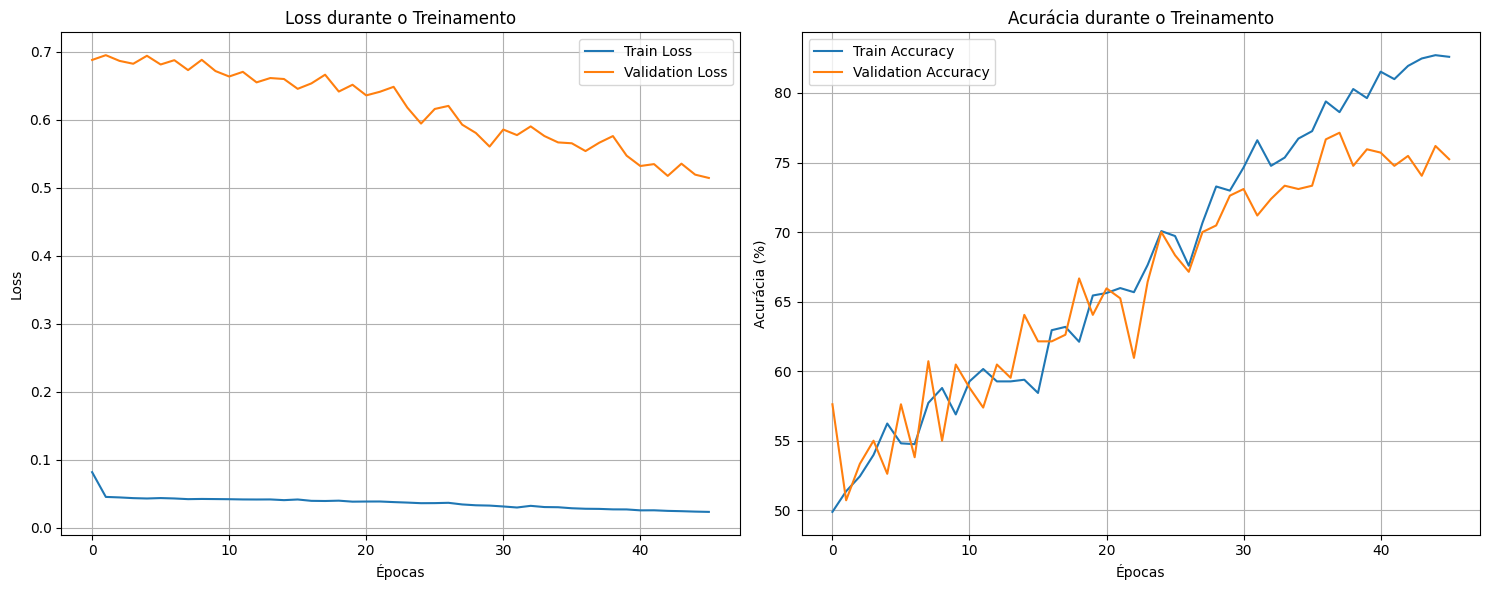

Modelo salvo com sucesso em: /content/drive/MyDrive/models/violence_videomae_a100.pth


In [32]:
if __name__ == "__main__":
    run_training()